#**Questions for Analysis:**

*   What is the average price  according to the location?
*   Number of active hosts per location (Where most of the hosts focused to own property?)
*   Which properties are the busiest in terms of Number of Bookings ?
*   Find the total count of each room type
*   Room types and their relation with availability in different neighbourhood groups.
*   Which are the top 25 most used words in listing names?
*   Find top 10 hosts with most listings.

## ***1. Know Your Data***

### Import Libraries

In [3]:
#import all library that will be used in entire project
import numpy as np                               #importing numpy
import pandas as pd                              #imporing pandas
import matplotlib.pyplot as plt                  #imporitng matplotlib
plt.rcParams['figure.figsize'] = (10, 7)         #to set the default size of figures
import seaborn as sns                            #importing seaborn
import missingno as msno                         #importing missingo for visulizing missing data

### Dataset Loading

In [4]:
#Mount google drive for access the dataset of Airbnb
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#File path of Airbnb dataset in google drive
file_path = "/content/drive/MyDrive/Airbnb NYC 2019.csv"
airbnb_df = pd.read_csv(file_path)

### Dataset First View

In [6]:
#Dataset First Look
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
row , column = airbnb_df.shape
print("No of rows:",row)
print("No of columns:",column)

No of rows: 48895
No of columns: 16


Dataset Information

In [8]:
#Information about the columns how many are their and their data types
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Duplicate Values

In [9]:
#Dataset Duplicate Value Count
#After seeing the output we can tell there is no duplicate rows are present
airbnb_df[airbnb_df.duplicated()].sum()

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

Missing values/Null values

In [10]:
# Missing Values/Null Values Count
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<Axes: >

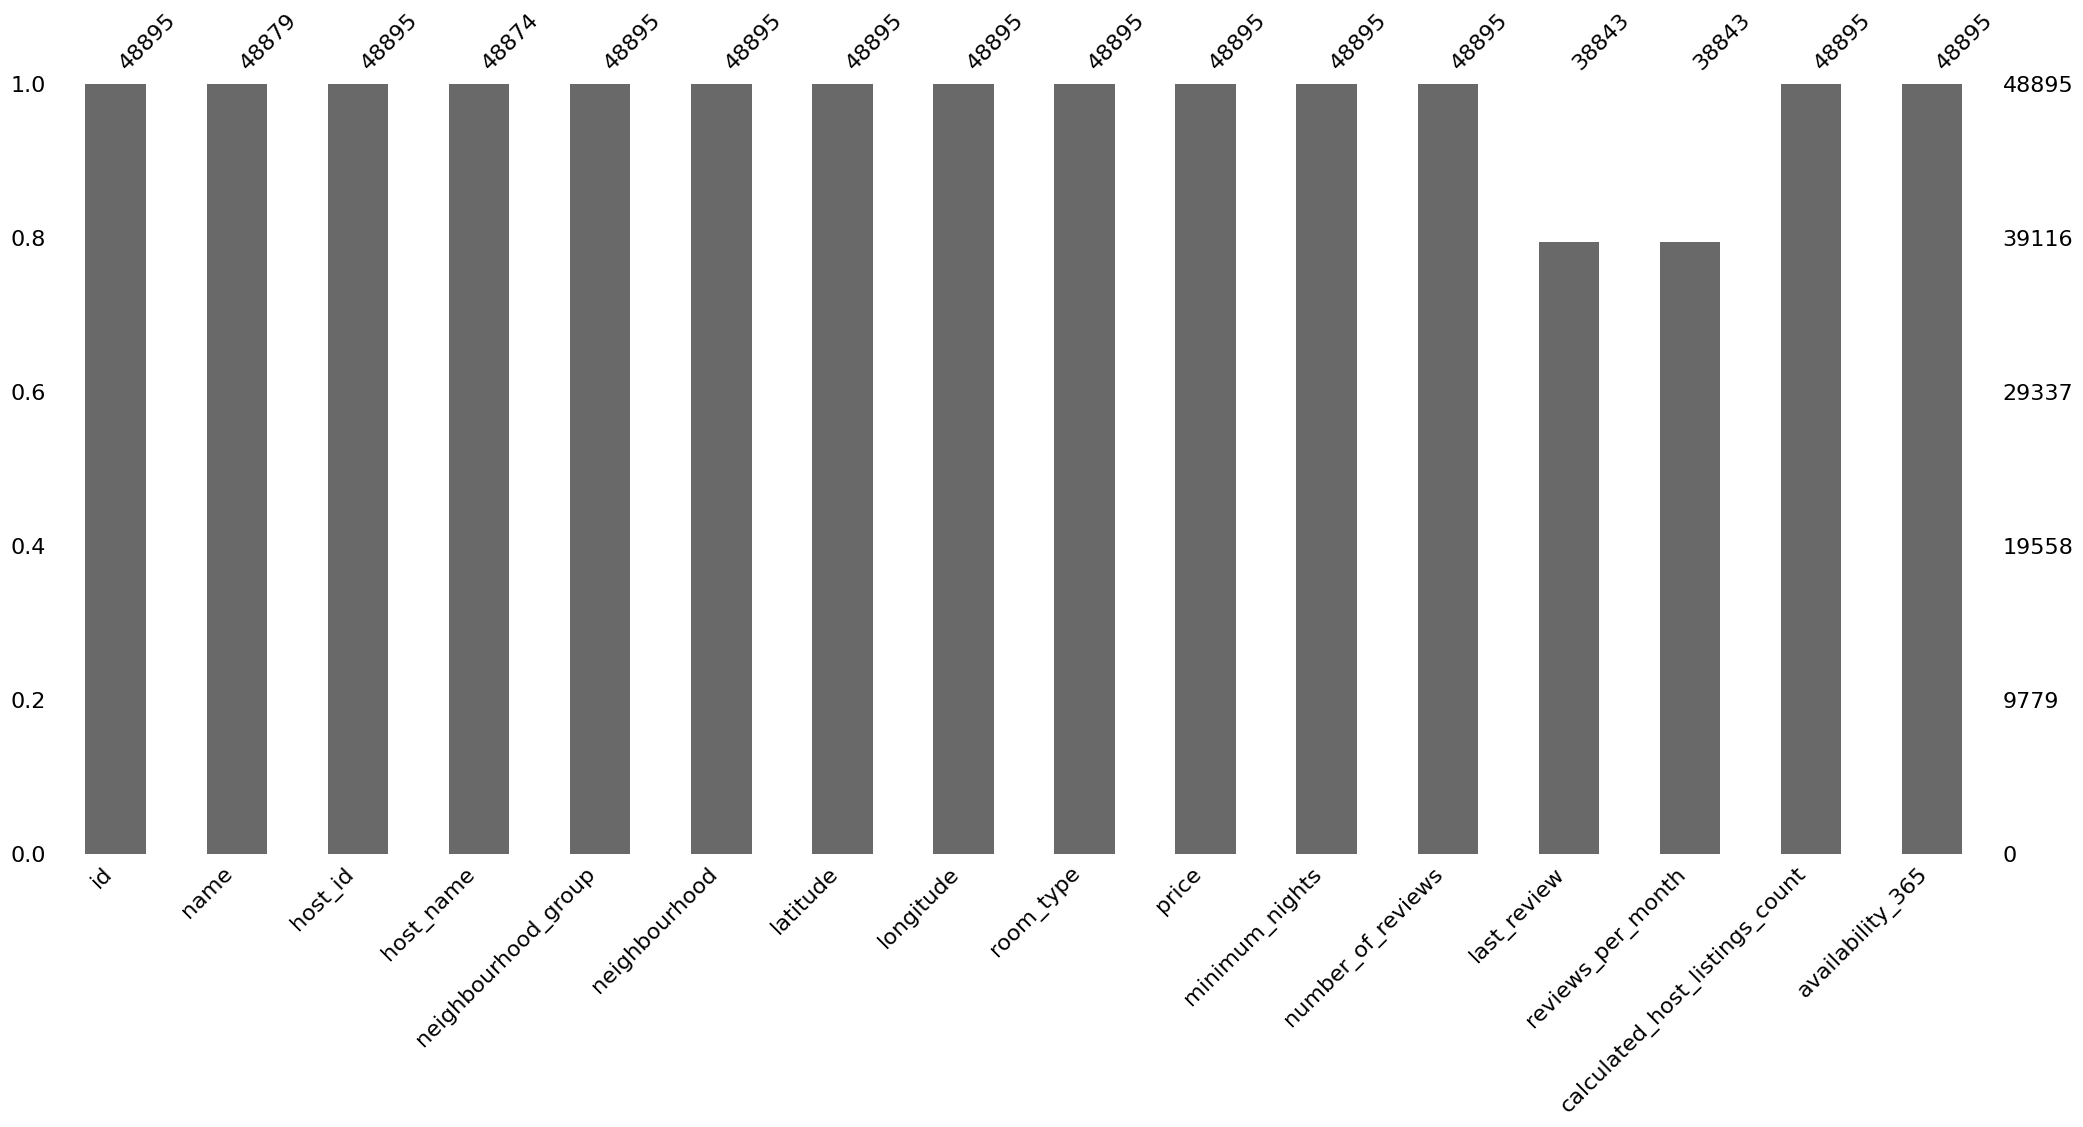

In [11]:
# Visualizing the missing values
msno.bar(airbnb_df)

### What did you know about your dataset?

As per the above information, we can see the columns name, host_name, neighbourhood_group, neighborhood and room_type are all object types. Others are either int or float type.

The following are the counts for null values we have got:
* name - 16
* host_name - 21
* last_review - 10052
* reviews_per_month - 10052


## ***2. Understanding Your Variables***

In [12]:
#Dataset Columns
print(airbnb_df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [13]:
#Dataset Describe
airbnb_df.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


### Variables Description

### The following columns are listed in the DataFrame

* ID(int64) - ID of the person who booked the Airbnb.
* Name(object) - Name or title.
* host_id(int64) - ID of the person who rents out the property.
* Host_name(object) - Name of the person who rents out their property.
* neighbourhood_group(object)- It indicates the region that includes several small neighborhoods (i.e. like a broader group having smaller units of neighborhood).
* Neighborhood(object) - It indicates the geographically smaller areas within a city or region having their own local identity and characteristics.
* Latitude(float64) - Shows the measurement of the distance from the north or south pole of an equator of that particular property.
* Longitude(float64) - Shows the measurement of distance from the east or west prime meridian of that particular property.
* room_type(object) - Indicates the type of the room i.e. private room, Entire home/apt, or shared room.
* price(int64) - This indicates the value at which the property is rented in bucks.
* minimum_nights(int64) - This shows the minimum nights.
* number_of_reviews(int64) - This indicates the number of reviews received by a particular property.
* last_review(object) - Shows the last date of the review given
* reviews_per_month(float64) - It indicates the number of reviews given in a particular month.
* calculated_host_listings_count(int64)- It shows the count of listings per host.
* availability_365(int64) - It indicates for how many days the Airbnb is available in a year.


### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
unique_values = {}
for column in airbnb_df.columns:
    unique_values[column] = airbnb_df[column].unique()

# Print unique values for each variable
for column, values in unique_values.items():
    print(f"Unique values for {column}:\n{values}\n")

Unique values for id:
[    2539     2595     3647 ... 36485431 36485609 36487245]

Unique values for name:
['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' ...
 'Sunny Studio at Historical Neighborhood'
 '43rd St. Time Square-cozy single bed'
 "Trendy duplex in the very heart of Hell's Kitchen"]

Unique values for host_id:
[     2787      2845      4632 ... 274321313  23492952  68119814]

Unique values for host_name:
['John' 'Jennifer' 'Elisabeth' ... 'Abayomi' 'Alberth' 'Ilgar & Aysel']

Unique values for neighbourhood_group:
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']

Unique values for neighbourhood:
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' '

In [15]:
# Check Unique Values count for each variable.
d={}
for i in airbnb_df.columns:
  u=airbnb_df[i].unique()
  d[i]=len(u)
df = pd.DataFrame([d])
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,48895,47906,37457,11453,5,221,19048,14718,3,674,109,394,1765,938,47,366


## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
#Write your code to make your dataset analysis ready.
#droping the unwanted and null values
airbnb_df.drop(['last_review','reviews_per_month'],axis=1,inplace=True)
airbnb_df.dropna(inplace=True)
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


In [17]:
#again checking for null values
airbnb_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [18]:
# Dataset Info and check how many entries are there left after cleaning the data
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               48858 non-null  int64  
 12  calculated_host_listings_count  

In [19]:
#Counting the number of rows and column after cleaning the data set
row, columns = airbnb_df.shape
print(f"No of rows: {row}")
print(f"No of columns: {columns}")

No of rows: 48858
No of columns: 14


In [20]:
#again checkin for unique values in each column
uniq={}
for i in airbnb_df.columns:
  u=airbnb_df[i].unique()
  uniq[i]=len(u)
df = pd.DataFrame([uniq])
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,48858,47884,37425,11450,5,221,19039,14716,3,674,108,394,47,366


In [21]:
#the view after cleaning
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [22]:
def outliers(col):
  sns.boxplot(airbnb_df[col],color='#A059BF')
  plt.ylabel(col)
  return plt.show()

enter column name:
minimum_nights


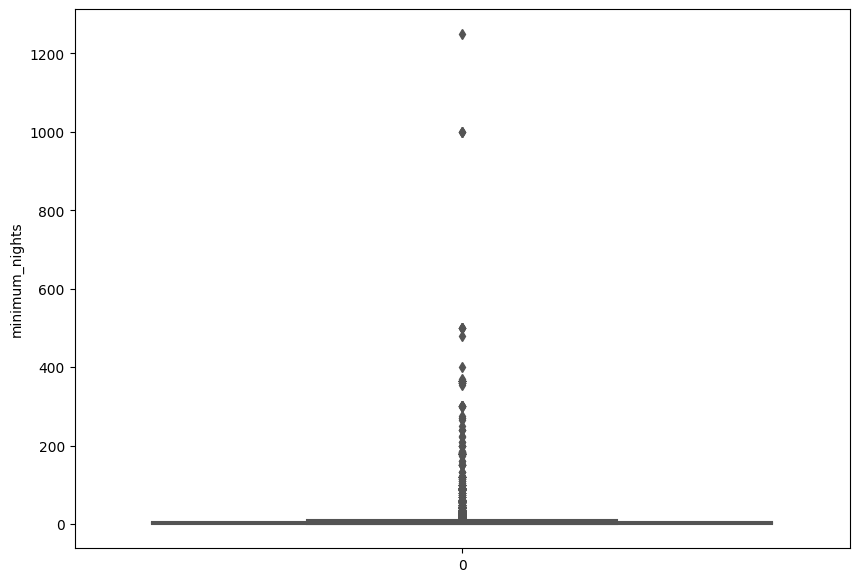

In [23]:
x=input("enter column name:\n")
outliers(x)

In [24]:
#removing outliers
airbnb_df.drop(airbnb_df[airbnb_df['minimum_nights']>=600].index,inplace=True,axis=0)

In [25]:
#handling outliers having 0 price
x=airbnb_df['price'].mode()
airbnb_df['price'].replace(0,x[0],inplace=True)

In [26]:
#imputing values for outliers
x=airbnb_df['availability_365'].mean()
airbnb_df['availability_365'].replace(0,round(x),inplace=True)

### What all manipulations have you done and insights you found?

* The columns last_review and reviews_per_month had large number of null values which contributed a lot to the data and from analysis point of view these columns are of no significance so we dropped these columns.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

####Chart - 1

What is the average preferred price by customers according to the location?

In [27]:
#Average_price of property according to the location
avg_price_preffered_df = airbnb_df.groupby(['neighbourhood_group','room_type'], as_index=False)['price'].mean().rename(columns={'price':'Average price'})
avg_price_preffered_df

,neighbourhood_group,room_type,Average price
0,Bronx,Entire home/apt,127.645503
1,Bronx,Private room,66.941718
2,Bronx,Shared room,58.610169
3,Brooklyn,Entire home/apt,178.373077
4,Brooklyn,Private room,76.569650
5,Brooklyn,Shared room,51.012107
6,Manhattan,Entire home/apt,249.262436
7,Manhattan,Private room,116.805594
8,Manhattan,Shared room,88.933194
9,Queens,Entire home/apt,147.050573


In [28]:
#Unstack the group by information for plot the graph
avg_price_preffered_df = airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_price_preffered_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.645503,66.941718,58.610169
Brooklyn,178.373077,76.569650,51.012107
Manhattan,249.262436,116.805594,88.933194
Queens,147.050573,71.776855,69.020202
Staten Island,173.846591,62.292553,57.444444


Text(0, 0.5, 'price')

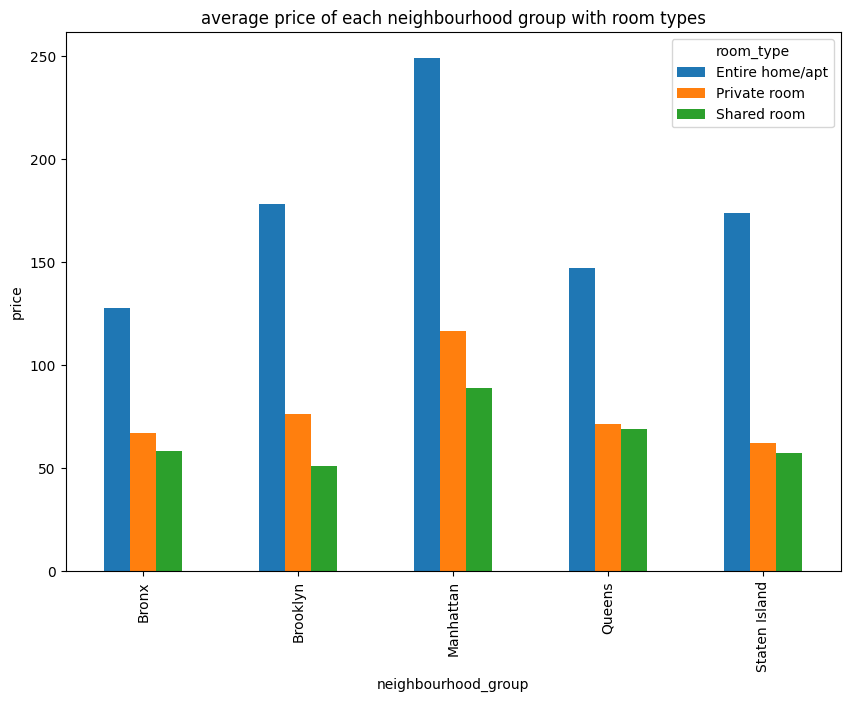

In [29]:
#Graph of average price of property according to location
avg_price_preffered_df.plot.bar()
plt.title("average price of each neighbourhood group with room types")
plt.ylabel("price")

##### 1. Why did you pick the specific chart?

The chart is used to visualize average prices for different room types across neighborhood groups in Airbnb listings which is a categorical data and categorical data is best shown with the bar graph .

##### 2. What is/are the insight(s) found from the chart?

It can be concluded that manhatten(neighbourhood group) has the highest average pricing in all the room types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart provides a visual understanding of average prices for room types in different neighborhoods, offering insights that can optimize pricing, marketing, and overall business strategies, potentially leading to positive impacts on revenue and customer satisfaction.
Marketing or price optimizing can be a solution for Bronox like cityes.

#### Chart - 2

No. of active host per location (Where most of the host focused to own property)

In [30]:
#Apply group by operation on neighbourhood_group for find the number of host according to location
no_of_host_per_location = airbnb_df.groupby('neighbourhood_group',as_index=False)['host_id'].count().sort_values(['host_id'], ascending=False).rename(columns={'neighbourhood_group':'Location','host_id':'Host'})
no_of_host_per_location

,Location,Host
2,Manhattan,21640
1,Brooklyn,20088
3,Queens,5664
0,Bronx,1089
4,Staten Island,373


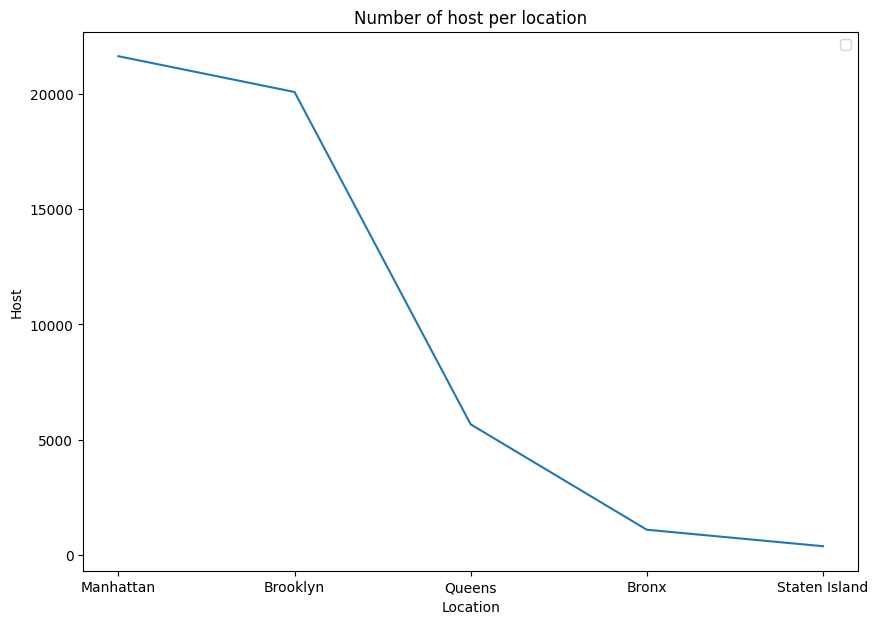

In [31]:
#Graph to show the number of host according to the location
plt.legend(labels = ['No. of Host'])
plt.plot(no_of_host_per_location['Location'], no_of_host_per_location['Host'])
plt.title('Number of host per location')
plt.ylabel('Host')
plt.xlabel('Location')
plt.show()

##### 1. Why did you pick the specific chart?

Helps in understanding the density of hosts in different areas, which can inform marketing strategies.

##### 2. What is/are the insight(s) found from the chart?

Provides a visual representation of the distribution of hosts across different neighborhood groups.Highlights neighborhoods with the highest concentration of hosts.Manhatan has higher number of hosts,then brooklyn,queens location and so on.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Assists in balancing supply and demand by optimizing host acquisition efforts in areas with fewer hosts.

Focusing solely on host numbers may overlook other factors influencing market performance.

#### Chart - 3

Which properties are the busiest in terms of Number of Bookings ?

In [32]:
#Highest number of bookings of the property
highest_bookings= airbnb_df.groupby(['neighbourhood_group','name'])['name'].agg({'count'}).reset_index().rename(columns={'count': "No of bookings", 'name':"Property Name" }).sort_values(by='No of bookings',ascending=False)
top_ten_highest_bookings= highest_bookings[:10]
top_ten_highest_bookings

,neighbourhood_group,Property Name,No of bookings
44549,Queens,Hillside Hotel,18
5256,Brooklyn,Brooklyn Apartment,12
12114,Brooklyn,Loft Suite @ The Box House Hotel,11
2824,Brooklyn,Artsy Private BR in Fort Greene Cumberland,10
15307,Brooklyn,Private room in Williamsburg,8
7661,Brooklyn,Cozy Brooklyn Apartment,8
15264,Brooklyn,Private room in Brooklyn,8
3379,Brooklyn,Beautiful Brooklyn Brownstone,8
44585,Queens,Home away from home,8
29983,Manhattan,Harlem Gem,7


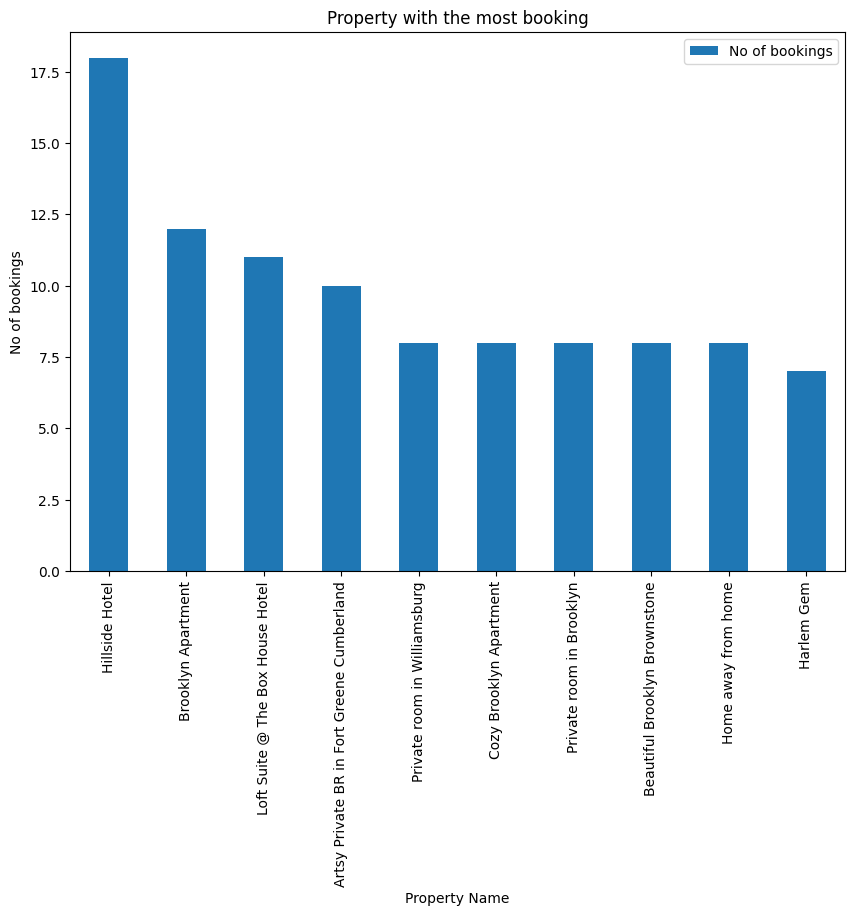

In [33]:
#Graph for the top 10 highest bookings
top_ten_highest_bookings.plot.bar(x='Property Name',y = 'No of bookings')
plt.title('Property with the most booking')
plt.ylabel('No of bookings')
plt.xlabel('Property Name')
plt.show()

##### 1. Why did you pick the specific chart?

 Since  property name is categorical data and number of booking is the numerical data and for depicting this appropriate graph is bar graph.

##### 2. What is/are the insight(s) found from the chart?

Visualize the top 10 properties with the highest number of bookings in the Airbnb dataset.We can easily infer from the graph that all the top ten properties have the same number of bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Provides insight into the success of certain hosts and their properties.Recognizing popular properties can inform targeted marketing efforts for those specific listings.High-performing hosts may be approached for potential partnerships or collaborations.Displaying top-performing properties can enhance customer trust in the platform.

Other hosts may feel neglected if not featured, potentially impacting relationships.Focusing solely on the number of bookings may overlook other factors like customer satisfaction.

#### Chart - 4

Finding Total count of each room types

In [34]:
#Finding unique values from column 'room_type'
airbnb_room_type = airbnb_df.room_type.unique()
airbnb_room_type

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [35]:
#Which is the most listed room type?
airbnb_roomtype_count = dict(airbnb_df.room_type.value_counts())
airbnb_roomtype_count

{'Entire home/apt': 25391, 'Private room': 22305, 'Shared room': 1158}

Text(0.5, 1.0, 'Count of Listed Rooms')

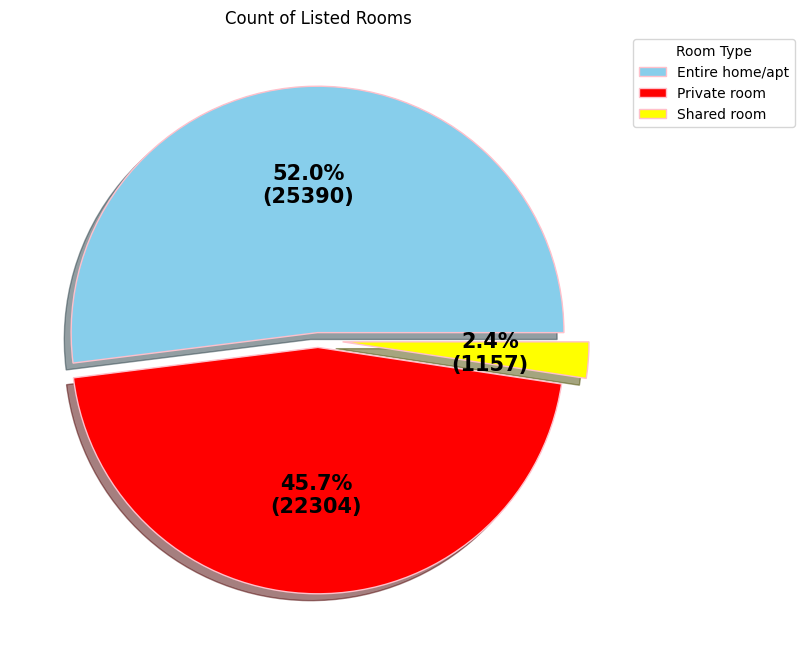

In [36]:
#Creating Dataset
room_type = list(airbnb_roomtype_count.keys())
data = list(airbnb_roomtype_count.values())

#Creating color parameters
colors = ( "skyblue", "red", "yellow",)

#Creating explode data
explode = (0.03, 0.03, 0.1)

#Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "pink" }

#Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

#Creating Pie Chart
fig, airbnb_pie_chart = plt.subplots(figsize =(12, 8))
wedges, texts, autotexts = airbnb_pie_chart.pie(data, autopct = lambda pct: func(pct, data),
                                                explode = explode,
                                                shadow = True,
                                                colors = colors,
                                                startangle = 0,
                                                wedgeprops = wp,
                                                textprops = dict(color ="black"))

#Adding legend
airbnb_pie_chart.legend(wedges, room_type,
                        title ="Room Type",
                        loc ="upper left",
                        bbox_to_anchor=(1, 0., 0.,1))

plt.setp(autotexts, size = 15, weight = "bold")
airbnb_pie_chart.set_title("Count of Listed Rooms")

##### 1. Why did you pick the specific chart?

Pie chart provides a visual representation of the proportion of each room type in the dataset.A pie chart is effective in visually communicating the distribution of room types, making it easy to grasp.

##### 2. What is/are the insight(s) found from the chart?

The Entire home/apt are highest in count(52.2%) and shared rooms are lowest in count(2.4%) and private room are 45.4%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps in tailoring marketing strategies based on the popularity of different room types.

#### Chart - 5

Finding Relation between neighbourhood group and availability of rooms

Text(0.5, 0, 'Neighbourhood Group')

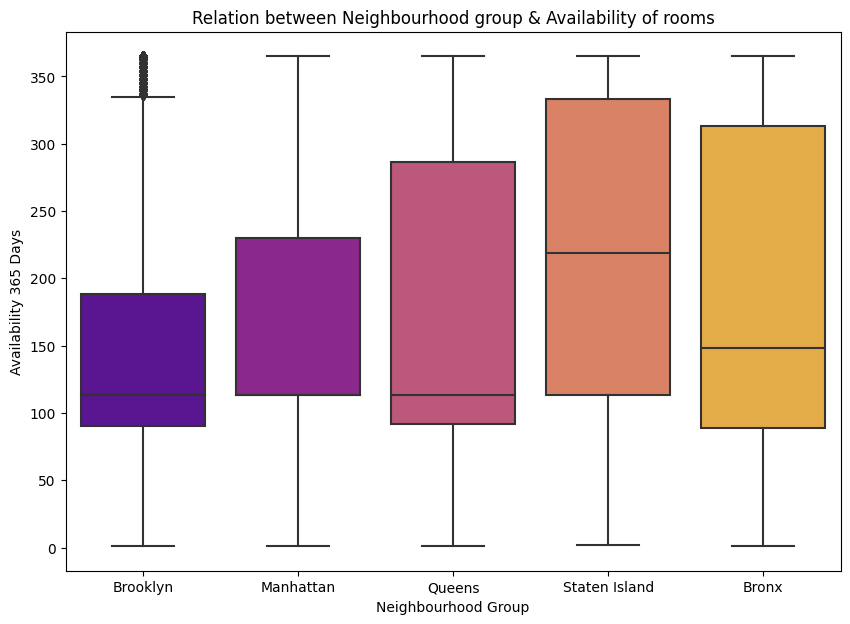

In [37]:
#Create a box plot to show the relation between the number of availability of rooms in neighbourhood group
ax = sns.boxplot(data=airbnb_df, x='neighbourhood_group',y='availability_365',palette='plasma')
ax.set_title('Relation between Neighbourhood group & Availability of rooms')
ax.set_ylabel('Availability 365 Days')
ax.set_xlabel('Neighbourhood Group')

##### 1. Why did you pick the specific chart?

The box plot visualizes the relationship between room availability and neighborhood groups, providing insights into distribution and outliers.

##### 2. What is/are the insight(s) found from the chart?

There is highest avalibility in Staten Island and lowest in Brooklyn.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Informs pricing strategies based on the availability of rooms in different neighborhood groups.Understanding the distribution of room availability aids in balancing supply and demand, optimizing the marketplace.Can contribute to a better user experience by setting appropriate expectations for room availability.


#### Chart - 6

What are the top 25 most used words from listing names

In [38]:
#Creting empty list to store name strings
airbnb_names=[]

#Getting name string from 'name' column and appending it to the empty list
for name in airbnb_df.name:
    airbnb_names.append(name)

#Setting a function to split name strings into seperate words
def split_name(name):
    ns = str(name).split()
    return ns

#Creating empty list to store the count of words
names_count = []

#Getting name string to append it to the names_count list
for n in airbnb_names:
    for word in split_name(n):
        word = word.lower()
        names_count.append(word)

In [39]:
#Importing 'counter' library to count and generate raw data and count top 25 most used words
from collections import Counter

#Counting most common words
count_words = Counter(names_count).most_common()
count_words[:25]

[('in', 16722),
 ('room', 9383),
 ('bedroom', 7226),
 ('private', 6983),
 ('apartment', 6111),
 ('cozy', 4631),
 ('the', 3866),
 ('to', 3826),
 ('studio', 3769),
 ('brooklyn', 3629),
 ('apt', 3571),
 ('spacious', 3383),
 ('1', 3354),
 ('with', 3092),
 ('2', 3077),
 ('of', 2992),
 ('east', 2966),
 ('and', 2868),
 ('manhattan', 2854),
 ('&', 2820),
 ('park', 2631),
 ('sunny', 2535),
 ('beautiful', 2318),
 ('near', 2293),
 ('williamsburg', 2292)]

In [40]:
#Cleaning the List by removing prepositions
items_to_remove = {('in', 16733), ('the', 3869), ('to', 3827), ('of', 2993), ('-', 2272), ('a', 1909)}
top_25_cleaned = [e for e in count_words if e not in items_to_remove]
top_25 = top_25_cleaned[:25]
top_25

[('in', 16722),
 ('room', 9383),
 ('bedroom', 7226),
 ('private', 6983),
 ('apartment', 6111),
 ('cozy', 4631),
 ('the', 3866),
 ('to', 3826),
 ('studio', 3769),
 ('brooklyn', 3629),
 ('apt', 3571),
 ('spacious', 3383),
 ('1', 3354),
 ('with', 3092),
 ('2', 3077),
 ('of', 2992),
 ('east', 2966),
 ('and', 2868),
 ('manhattan', 2854),
 ('&', 2820),
 ('park', 2631),
 ('sunny', 2535),
 ('beautiful', 2318),
 ('near', 2293),
 ('williamsburg', 2292)]

In [41]:
#Converting the data into DataFrame
word_count_df = pd.DataFrame(top_25)
word_count_df.rename(columns={0:'Words',1:'Counts'},inplace=True)
word_count_df

,Words,Counts
0,in,16722
1,room,9383
2,bedroom,7226
3,private,6983
4,apartment,6111
5,cozy,4631
6,the,3866
7,to,3826
8,studio,3769
9,brooklyn,3629


[Text(0, 0, 'in'),
 Text(1, 0, 'room'),
 Text(2, 0, 'bedroom'),
 Text(3, 0, 'private'),
 Text(4, 0, 'apartment'),
 Text(5, 0, 'cozy'),
 Text(6, 0, 'the'),
 Text(7, 0, 'to'),
 Text(8, 0, 'studio'),
 Text(9, 0, 'brooklyn'),
 Text(10, 0, 'apt'),
 Text(11, 0, 'spacious'),
 Text(12, 0, '1'),
 Text(13, 0, 'with'),
 Text(14, 0, '2'),
 Text(15, 0, 'of'),
 Text(16, 0, 'east'),
 Text(17, 0, 'and'),
 Text(18, 0, 'manhattan'),
 Text(19, 0, '&'),
 Text(20, 0, 'park'),
 Text(21, 0, 'sunny'),
 Text(22, 0, 'beautiful'),
 Text(23, 0, 'near'),
 Text(24, 0, 'williamsburg')]

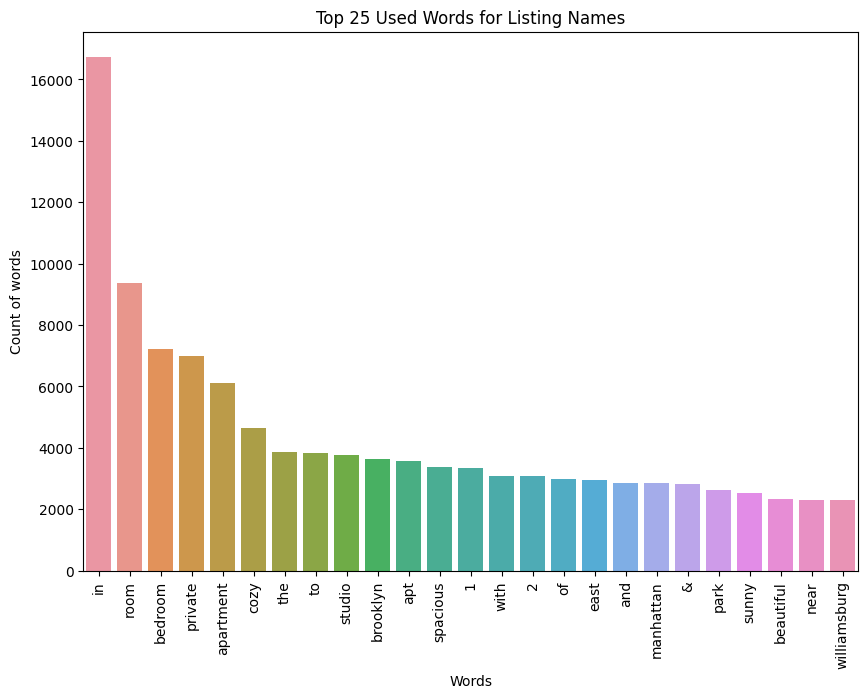

In [42]:
#Plotting the Chart
count_viz = sns.barplot(data = word_count_df,x='Words',y='Counts')
count_viz.set_title('Top 25 Used Words for Listing Names')
count_viz.set_ylabel('Count of words')
count_viz.set_xlabel('Words')

#Adjusting Bar labels
count_viz.set_xticklabels(count_viz.get_xticklabels(),rotation = 90)

From the chart above, we see the top 25 words used in the listing name. We can use the word cloud visualization method to help us better understand the chart.

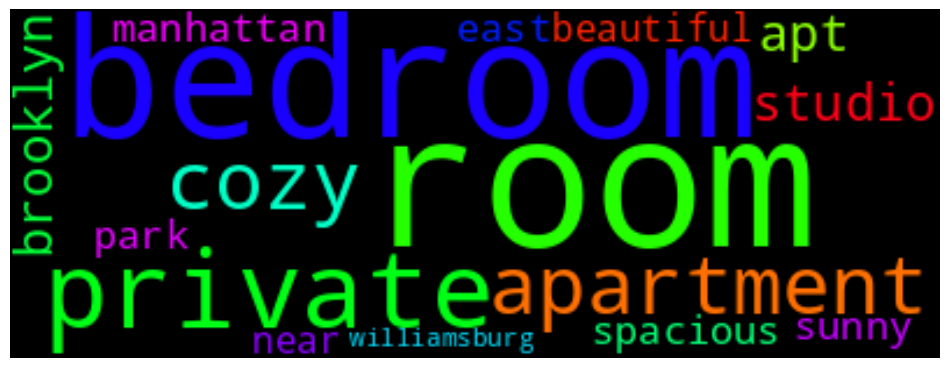

In [43]:
#Importing WordCloud library
from wordcloud import WordCloud, ImageColorGenerator
text = ' '.join(str(n) for n in word_count_df.Words)

#Generating wordcloud image
wordcloud = WordCloud(max_font_size=80, colormap='hsv', width=400, height=150).generate(text)
plt.figure(figsize=(12,8))

#Displaying the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

The word cloud visually represents the frequency of words in the given text.Highlights terms that are more frequently mentioned in a visually striking way.

##### 2. What is/are the insight(s) found from the chart?

The words most used in name/title can be visualized.The most used words are like room,bedroom,studio and apt.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Provides a quick overview of the most prominent terms in the data.Identifies key terms that may be relevant for marketing or business strategy.

#### Chart - 7

Find top 10 hosts with most listings

In [44]:
#Creating DataFrame of host id with the number of counts
listing_count=airbnb_df['host_id'].value_counts().reset_index()
count_host_id_df= pd.DataFrame(listing_count)
count_host_id_df.rename(columns={'index':'Host_Id','host_id':'Counts'},inplace=True)

#Storing top 10 hosts with most listings
top_host_id = count_host_id_df.head(10)
top_host_id

,Host_Id,Counts
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


Text(0, 0.5, 'Count of listings')

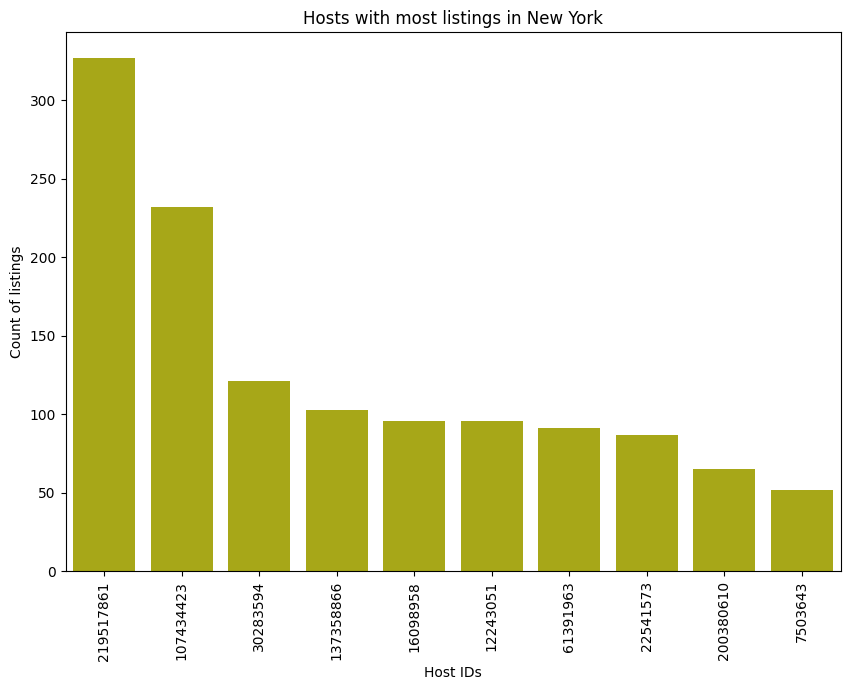

In [45]:
#Plotting the Chart
top_host_chart = sns.barplot(x= 'Host_Id', y= 'Counts', color='y', data=top_host_id, order=top_host_id.sort_values('Counts',ascending = False).Host_Id)
plt.xticks(rotation=90)
top_host_chart.set_title('Hosts with most listings in New York')
top_host_chart.set_xlabel('Host IDs')
top_host_chart.set_ylabel('Count of listings')

##### 1. Why did you pick the specific chart?

Identifies and displays the top hosts based on the count of their listings.

##### 2. What is/are the insight(s) found from the chart?

The bar graph shows the top 10 host_id with highest listing.The top most is 219517861 and so on.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Informs marketing strategies by identifying hosts with a significant number of listings.Displaying information about top hosts can enhance the user experience for guests.

Focusing solely on the number of listings may overlook other aspects of host performance.

**Insights :**

*   Manhattan is the most focused place in New York for hosts to do their business.
* Manhattan and Broklyn has the most number of hosts.

*  Customers pay highest average amount in Manhattan for all the three types of room.

*  'Entire home/apt' room type has the highest number of listing of 52% and ‘Shared Room’ is the least listed room type at only 2.4% in total.
* There is highest avalibility in Staten Island and lowest in Brooklyn in the year.
*  People stay for longer duration of time in Private rooms in Brooklyn and Manhattan.
*  Words such as ‘bedroom’, ‘cozy’, ‘private’, ‘apartment’ and ‘spacious’ are used more frequently than words such as ‘park’, ‘near’, ‘village’ and ‘heart’.
